# Measuring ported speaker response without anechoic chamber
Francis Deck, Jan. 10, 2024

This came up in a recent TalkBass thread, and I realize that I had misplaced my original blog on the topic. I wrote it sometime around 2006, to accompany my 12" speaker design article.

The pictures here are from that article, the text is new and based on my big speaker theory article:

https://github.com/bassistTech/SpeakerTheory/blob/master/SpeakerTheory.pdf?raw=true

## Problem
Measuring speaker response is hard. It needs to be done in an anechoic chamber, or outdoors, the latter of which is covered in snow right now.

Ported speakers are a special problem, because you have to locate the microphone at a sufficient distance to let the cone and port blend together. At this distance, reflections from the floor and walls of your room are confounding your measurement.

## Prerequisites

My big article on how speakers work documents my understanding of the basic electromechanical model of sealed and ported speakers. That article is not peer reviewed, but the resulting model checks out quite well against popular speaker design software and my measurements using non commercial test gear.

## Precis of my solution

The electromechanical model contains a hidden gem: The equations for the relationship between input signal, cone motion, and port motion, are quite complicated, and depend on all of the design parameters (Thiele-Small plus box volume and port tuning). However, *the relationship between cone and port motion is simple*, and is based on only one parameter -- the port tuning frequency.

Thus, without knowing any details of the design, if you know the cone response function -- by measuring it -- you can compute the port response function. And by combining cone and port response, you can compute the overall SPL curve.

To make an obligatory car analogy, without knowing how the car was designed, if you know the path of the front wheels, you can make a fairly accurate guess of where the rear wheels are going, because the front and rear wheels are coupled together by the car.

**Here's the trick**: While both cone and port motion are related to the design parameters in complicated ways, they are also *related to one another* in a much simpler way. In fact the relationship only depends on the port tuning frequency! This suggests a method for obtaining an SPL graph:

1. Perform a near-field measurement of cone motion. In other words, put the measurement microphone really close to the cone. So close that the cone drowns out the port. The near-field measurement will show the familiar "dip" that lets you estimate the port tuning frequency.

2. Apply a correction function to the near-field data, based on the estimated port tuning frequency.

3. Graph it in dB. That's it!

It will produce a faithful response curve, but without an absolute SPL value. At some point you will have to measure the absolute SPL at one frequency, but that can wait until spring, or maybe it doesn't matter for what you're trying to learn.

**I want to emphasize** that I'm not dropping a bombshell on speaker theory. The theory remains the same, and speaker design remains unchanged. I'm just isolating a relationship between two of the equations, that might be useful for measuring speaker response in the home lab.

## The math
These equations are borrowed from my big article. Assuming they're correct...

This is the relationship between the displacement of the cone and the port:

$$\dfrac {x_{port}} {x_{cone}} = \dfrac {S_{cone} \omega_{port}^2} {S_{port}(\omega^2 - \omega_{port}^2)}$$

The total linear displacement of air is the sum of the cone and port:

$$S_{port} x_{port} + S_{cone} x_{cone} = S_{cone} x_{cone} + \dfrac {S_{cone} \omega_{port}^2 x_{cone}} {(\omega^2 - \omega_{port}^2)}$$

$$ = \dfrac {\omega^2} {(\omega_{port}^2 - \omega^2)}S_{cone}x_{cone}$$

This equation is given in "frequency space," meaning that the equation of motion is being expressed as a function of frequency, rather than as a function of time. The conversion from "time space" to "frequency space" is discussed in the big article, and is a routine analysis technique.

There's one more nuance: Sound pressure is proportional to the *acceleration* of the cone, and the equation given above is for *linear displacement*. In frequency space, acceleration introduces a factor of $\omega^2$:

$$SP \propto \omega^2 x$$

## The measurement

Place the measurement mic close to the speaker cone -- so close that the speaker sound will drown out the port sound, and any room echoes. What we need is a response curve, and the numerical data. If it's in dB, you have to convert it to amplitude:

$$SP_{cone} = 10^{dB/20}$$

This will not be an absolute SPL measurement, but a relative measurement. If you need absolute SPL, then you still need a calibrated microphone or SPL meter, and wait until spring.

## The calculation

You need to make your best estimate of the port tuning frequency $f_{port}$ from the "dip" in the nearfield response curve.

Take $SP_{cone}$ and multiply by the correction factor:

$$SP_{total} = SP_{cone}\lvert \dfrac {f^2} {f^2 - f_{port}^2} \rvert$$

Note the absolute value signs, which are my lazy way of hiding a phase inversion. Finally convert back into dB:

$$SP_{total}(dB) = 20 \log_{10}(SP_{total})$$

## My data

I dug up these graphs from my old write-up, so I'm going to paste them here. I'd like to collect some more data from multiple speakers, and convince myself that this idea really holds water. Meanthile, this is a nearfield cone response measurement from 2006, for my 12" bass speaker:

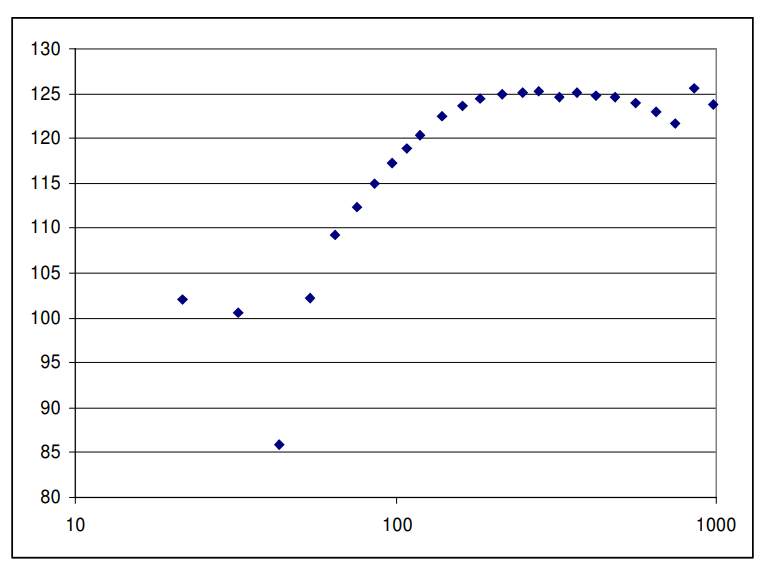

Vertical units are dB, I had to convert back to non-logarithmic units to use these data. And while the graph is poorly drawn (thanks Excel 97), the "dip" is at about 45 Hz.

Next, I applied the kappa factor to the near-field curve, and produced these curves:

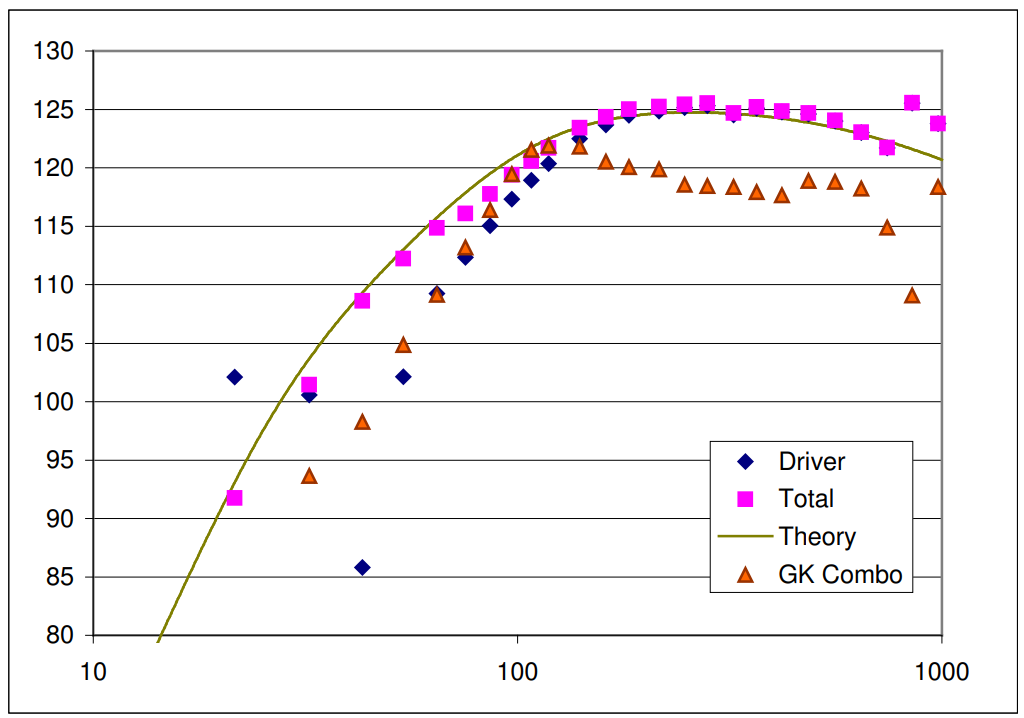

"Driver" is the nearfield curve. "Total" is the computed curve. "Theory" is from my modeling program. I adjusted the other curves up and down to have the same SPL reference. "GK Combo" is a measured curve from my GK MB150E-112 combo amp. You'll notice there's some malarkey going on at higher frequencies, but I don't claim to have a good model up there.

## Evaluation
None of my curves have a good *absolute* SPL reference. That still requires a chamber or outdoor measurement. But the relative response matches the theory equations well enough to satisfy me that the three components (near-field measurement, kappa factor, and overall theory) are in good enough agreement for DIY work.